In [54]:
import numpy as np
import random
from random import randint
from numpy.linalg import norm
from random import gauss
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import time
from numpy.random import shuffle
import matplotlib.pyplot as plt
import matplotlib 

In [55]:
global accuracyall
global timetaken
global dimsaftercompression
global sparsity
sparsity = [200, 500, 1000, 2000, 3000, 4000, 7000, 9000, 10000]
dimsaftercompression = [50, 100, 500, 800, 1000, 1500, 2000, 2500, 3000, 4000, 5000]
accuracyall = []
timetaken = []



In [56]:
def createinputmatrix(n, d, numberofones):
    v = np.zeros([int(0.6*n), d])
    for i in range(int(0.6*n)):
        numones = randint(a = 1, b = numberofones)
        for j in range(numones):
            index = randint(a = 0, b = d-1)
            v[i, index] = 1
    for k in range(int(0.2*n)):
        v1 = np.zeros([d])
        v2 = np.zeros([d])
        hdistance = randint(a = 1, b = 25)
        numones = randint(a = hdistance, b = numberofones)
        for j in range(numones - hdistance):
            index = randint(a = 0, b = d-1)
            v1[index] = 1
            v2[index] = 1
        for l in range(hdistance):
            index = randint(a = 0, b = d-1)
            v1[index] = 1
        for l in range(hdistance):
            index = randint(a = 0, b = d-1)
            v2[index] = 1
        v = np.append(v, values = [v1, v2], axis = 0)
        #v = shuffle(v)
    return v

In [57]:
def gethammingdistance(a, b):
   return np.count_nonzero(a!=b)
    

In [58]:
def ourtransform(reduceddim, matrix):
    start = time.time()
    mapping = []
    compressedmatrix = np.zeros([matrix.shape[0],reduceddim])
    for i in range(matrix.shape[1]):
        toss = randint(0, reduceddim-1)
        mapping.append(toss)
    for i in range(matrix.shape[0]):
        #reducedvector = []
        #vectoraftermapping = np.zeros([reduceddim,matrix.shape[1]])
        #vector = matrix[i]
        #print("rv",vector.shape)
        for j in range(matrix.shape[1]):
            compressedmatrix[i][mapping[j]] += matrix[i][j]
            #print(j)
        #for k in range(reduceddim):
        #   reducedvector.append((sum(vectoraftermapping[k]))%2)
        #reducedvector = np.array(reducedvector)
        #compressedmatrix = np.append(arr = compressedmatrix, axis = 0, values = [reducedvector])
    end = time.time()
    totaltime = end - start
    print(totaltime)
    timetaken.append(totaltime)
    return compressedmatrix

In [59]:
def getpairsets(matrix):
    set25 = set([])
    set20 = set([])
    set15 = set([])
    set10 = set([])
    set05 = set([])
    for i in range(matrix.shape[0]):
        vector = matrix[i]
        for j in range(i+1, matrix.shape[0]):
            hdistance = gethammingdistance(vector, matrix[j, :])
            if(hdistance <= 25):
                set25.add((i,j))
            if(hdistance <= 20):
                set20.add((i,j))
            if(hdistance <= 15):
                set15.add((i,j))
            if(hdistance <= 10):
                set10.add((i,j))
            if(hdistance <= 5):
                set05.add((i,j))
    return set05,set10,set15,set20,set25

In [60]:
def calculateaccuracy(matrix, compressedmatrix):
    
    oset05,oset10,oset15,oset20,oset25 = getpairsets(matrix)
    cset05,cset10,cset15,cset20,cset25 = getpairsets(compressedmatrix)
    
    intersection05 = len(oset05.intersection(cset05))
    intersection10 = len(oset10.intersection(cset10))
    intersection15 = len(oset15.intersection(cset15))
    intersection20 = len(oset20.intersection(cset20))
    intersection25 = len(oset25.intersection(cset25))
    
    union05 = len(oset05.union(cset05))
    union10 = len(oset10.union(cset10))
    union15 = len(oset15.union(cset15))
    union20 = len(oset20.union(cset20))
    union25 = len(oset25.union(cset25))
    
    if(union05==0):
        accuracy05 = 1
    else:
        accuracy05 = intersection05/union05
        
    if(union10==0):
        accuracy10 = 1
    else:
        accuracy10 = intersection10/union10
        
    if(union15==0):
        accuracy15 = 1
    else:
        accuracy15 = intersection15/union15
        
    if(union20==0):
        accuracy20 = 1
    else:
        accuracy20 = intersection20/union20
        
    if(union25==0):
        accuracy25 = 1
    else:
        accuracy25 = intersection25/union25
    
    
    accuracyall.append(accuracy05)
    accuracyall.append(accuracy10)
    accuracyall.append(accuracy15)
    accuracyall.append(accuracy20)
    accuracyall.append(accuracy25)    


In [61]:
def plotaccuracy(accuracy):    
    setof = [5,10,15,20,25]
    plt.figure(figsize=(3,3))
    for i in range(5):
        plt.plot(dimsaftercompression, accuracy[i], label = '%i' %setof[i])
    #plt.grid(b=True, which='major')
    
    plt.xticks([0,1000,2000,3000,4000,5000])
    plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
    #matplotlib.rc('xtick', labelsize=10) 
    #matplotlib.rc('ytick', labelsize=10)
    plt.xlabel('COMPRESSION LENGTH')
    plt.ylabel('ACCURACY')
    plt.legend()
    plt.show()

In [62]:
def plottimetaken():    
    plt.figure(figsize=(5,5))
    plt.plot(dimsaftercompression, timetaken)
    plt.grid(b=True, which='major')
    #plt.xticks(dimsaftercompression)
    plt.yticks([0,1,2,3,4,5,6,7])
    #matplotlib.rc('xtick', labelsize=10) 
    #matplotlib.rc('ytick', labelsize=10) 
    plt.show()

In [63]:
accuracy.shape

NameError: name 'accuracy' is not defined

In [64]:
def getalldata():
    
    accuracy = np.zeros([5,11])
    matrix = createinputmatrix(100, 100000, 200)
    for i in dimsaftercompression:
        print(i)
        compressedmatrix = ourtransform(i, matrix)
        calculateaccuracy(matrix, compressedmatrix)
        
    acindex = 0
    for j in range(11):
        for i in range(5):
            accuracy[i][j] = accuracyall[acindex]
            acindex += 1
    return accuracy
    
    
    

In [ ]:
test = np.zeros([5,11])
for i in range(1):
    print(i)
    test += getalldata()
    


0
50


In [ ]:
test = test/1
plotaccuracy(test)

In [48]:
def varysparsity():
    saccuracy = np.zeros([5,9])

    for i in sparsity:
        matrix = createinputmatrix(100, 100000, i)
        compressedmatrix = ourtransform(5000, matrix)
        calculateaccuracy(matrix, compressedmatrix)
    
    acindex = 0
    for j in range(9):
        for i in range(5):
            saccuracy[i][j] = accuracyall[acindex]
            acindex += 1
            
    return saccuracy
    
        

In [49]:
test = varysparsity()

6.281687021255493
6.2031848430633545
6.372942924499512
6.169425010681152
6.127632141113281
6.23579216003418
6.5040788650512695
6.401788949966431
6.129150867462158


In [103]:
test = getalldata()

50
6.5367591381073
100
6.251223087310791
500
6.143294095993042
800
6.180294036865234
1000
6.190447092056274
1500
6.196944952011108
2000
6.214958906173706
2500
6.256834983825684
3000
6.2416298389434814
4000
6.158505916595459
5000
6.176840305328369


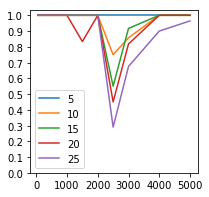

In [104]:
plotaccuracy(test)